In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

#### Performance Surfaces and Optimum Points

### Performance Learning and Taylor Series Expansion

#### Objectives
This chapter introduces **performance learning**, a class of neural network training techniques where the goal is to optimize the performance of the network by adjusting its parameters (weights and biases). We aim to minimize the **performance index**, which measures how well the network performs. 

The learning process involves:
1. **Defining a performance index** (a quantitative measure of the network's performance).
2. **Searching the parameter space** (adjusting network parameters) to minimize the performance index.

We will use the **Taylor Series Expansion** to investigate the behavior of performance surfaces and understand conditions that guarantee a minimum point (optimum). The minimization of this surface will be covered in detail in later chapters.

---

### Taylor Series Expansion

Let $ F(x) $ be the performance index, where $ x $ is the scalar parameter being adjusted. Assume that $ F(x) $ is an analytic function, and all its derivatives exist. Using the **Taylor series expansion** about a nominal point $ x^\ast $, we have:

$$
F(x) = F(x^\ast) + \left. \frac{dF(x)}{dx} \right|_{x = x^\ast} (x - x^\ast) + \frac{1}{2} \left. \frac{d^2F(x)}{dx^2} \right|_{x = x^\ast} (x - x^\ast)^2 + \cdots
$$

This can be truncated to approximate $ F(x) $ using a finite number of terms.

---

#### Example: Taylor Series for $ \cos(x) $

Let:
$$
F(x) = \cos(x)
$$

Expanding $ \cos(x) $ around $ x^\ast = 0 $, we get:
$$
F(x) = \cos(0) - \sin(0)(x - 0) - \frac{1}{2}\cos(0)(x - 0)^2 + \frac{1}{6}\sin(0)(x - 0)^3 + \cdots
$$

Simplifying:
$$
F(x) = 1 - \frac{1}{2}x^2 + \frac{1}{24}x^4 + \cdots
$$

Thus, the approximations for $ F(x) $ at different orders are:

1. **Zeroth-order approximation**:
   $$ 
   F_0(x) \approx 1
   $$

2. **Second-order approximation**:
   $$ 
   F_2(x) \approx 1 - \frac{1}{2}x^2
   $$

3. **Fourth-order approximation**:
   $$ 
   F_4(x) \approx 1 - \frac{1}{2}x^2 + \frac{1}{24}x^4
   $$

---

### Plot: Cosine Function and Taylor Series Approximations

The graph below compares the true $ \cos(x) $ function with its Taylor series approximations up to zeroth, second, and fourth order.

![Cosine Function Approximations](cosine_approximations.png)

---

### Summary
The Taylor series allows us to approximate the performance index by limiting the expansion to a finite number of terms. In this chapter, we explored how performance surfaces can be represented using such expansions and their implications for finding minima and maxima.


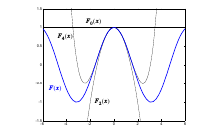

Figure.1 Cosine Function and Taylor Series Approximations

### Accuracy of Taylor Series Approximations

From the figure, we observe that all three approximations (zeroth, second, and fourth order) are accurate when $ x $ is very close to $ x^\ast = 0 $. However, as $ x $ moves farther away from $ x^\ast $, only the higher-order approximations maintain their accuracy.

- The **zeroth-order approximation** $( F_0(x) $) is accurate near $ x^\ast = 0 $.
- The **second-order approximation** ($ F_2(x) $) is accurate over a wider range than the zeroth-order.
- The **fourth-order approximation** ($ F_4(x) $) is accurate over the widest range among the approximations.

---

#### Explanation of the Behavior

The behavior of the approximations can be explained by the Taylor series expansion in Eq. (8.1):
$$
F(x) = F(x^\ast) + \left. \frac{dF(x)}{dx} \right|_{x = x^\ast} (x - x^\ast) + \frac{1}{2} \left. \frac{d^2F(x)}{dx^2} \right|_{x = x^\ast} (x - x^\ast)^2 + \cdots
$$

Each succeeding term in the series contains higher powers of $ (x - x^\ast) $. As $ x $ moves closer to $ x^\ast $, these higher-order terms become geometrically smaller. Therefore, lower-order approximations (such as zeroth and second order) are sufficient near $ x^\ast $.

However, as $ x $ moves farther away from $ x^\ast $, the terms involving higher powers of $ (x - x^\ast) $ become more significant. Therefore, higher-order approximations (such as the fourth-order approximation) become necessary to maintain accuracy over a wider range of $ x $.

---

### Investigating the Shape of the Performance Index Near Optimum Points

We use the **Taylor series approximation** of the performance index to understand the behavior of the performance surface near potential **optimum points**. 

Since each term in the expansion provides more information about the curvature of the performance surface, we can approximate the shape of the surface near $ x^\ast $ using the first few terms of the series.

1. **Zeroth-order approximation** provides no information about the slope or curvature.
2. **Second-order approximation** gives insight into the curvature of the performance surface and helps us detect whether a point is a local minimum or maximum.
3. **Higher-order approximations** (e.g., fourth order) refine the shape further and give a more accurate description of the surface over a broader range of $ x $.

Understanding the behavior of the performance index in this way helps us identify and verify the **optimum points** (minima or maxima) during the optimization process.

---

### Summary
As we adjust the parameter $ x $, the accuracy of the Taylor series approximations depends on how close $ x $ is to the expansion point $ x^\ast $. Higher-order approximations are more accurate over a wider range. The Taylor series also gives us valuable insight into the shape of the **performance surface** near possible optimum points, which is crucial for performance learning and optimization.


ValueError: x and y must have same first dimension, but have shapes (400,) and (1,)

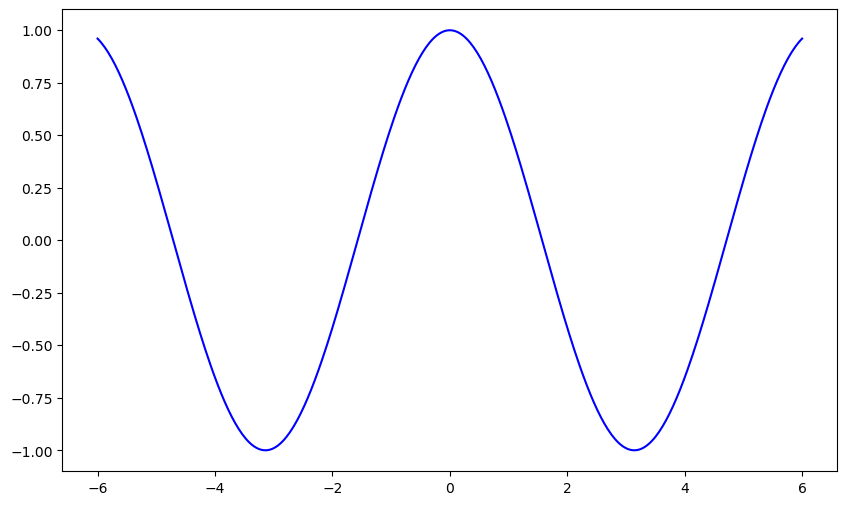

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the cosine function
def cos_function(x):
    return np.cos(x)

# Define Taylor series approximations
def taylor_approximation_0(x):
    return 1

def taylor_approximation_2(x):
    return 1 - (x**2 / 2)

def taylor_approximation_4(x):
    return 1 - (x**2 / 2) + (x**4 / 24)

# Generate values for x between -6 and 6
x_values = np.linspace(-6, 6, 400)

# Compute the values of the original function and its approximations
cos_values = cos_function(x_values)
approx_0_values = taylor_approximation_0(x_values)
approx_2_values = taylor_approximation_2(x_values)
approx_4_values = taylor_approximation_4(x_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, cos_values, label="cos(x)", color="blue")
plt.plot(x_values, approx_0_values, label="0th-order Approximation", linestyle="--", color="green")
plt.plot(x_values, approx_2_values, label="2nd-order Approximation", linestyle="--", color="orange")
plt.plot(x_values, approx_4_values, label="4th-order Approximation", linestyle="--", color="red")

# Add title and labels
plt.title("Taylor Series Approximations of cos(x)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


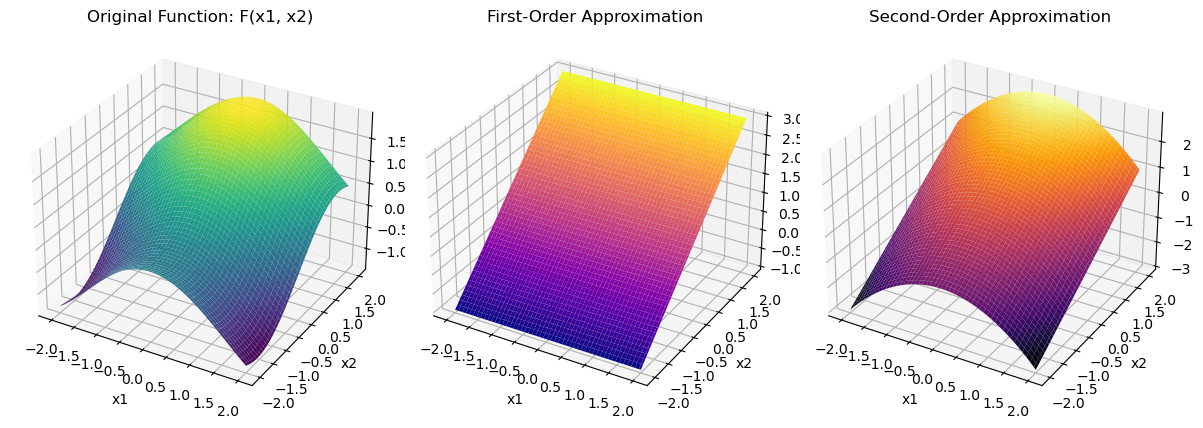

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def F(x1, x2):
    return np.cos(x1) + np.sin(x2)

# Define the gradient of F at (x1, x2)
def gradient_F(x1, x2):
    grad_x1 = -np.sin(x1)  # Partial derivative w.r.t x1
    grad_x2 = np.cos(x2)   # Partial derivative w.r.t x2
    return np.array([grad_x1, grad_x2])

# Define the Hessian matrix of F at (x1, x2)
def hessian_F(x1, x2):
    hess_x1x1 = -np.cos(x1)  # Second partial derivative w.r.t x1
    hess_x1x2 = 0            # Mixed second partial derivative w.r.t x1 and x2
    hess_x2x2 = -np.sin(x2)  # Second partial derivative w.r.t x2
    return np.array([[hess_x1x1, hess_x1x2], 
                     [hess_x1x2, hess_x2x2]])

# Define the Taylor expansion around (x1*, x2*) = (0, 0)
def taylor_expansion(x1, x2, x1_star=0, x2_star=0):
    # Zeroth-order approximation (just the function value at (0, 0))
    F0 = F(x1_star, x2_star)

    # First-order approximation (using the gradient)
    grad_F_star = gradient_F(x1_star, x2_star)
    first_order = F0 + grad_F_star[0] * (x1 - x1_star) + grad_F_star[1] * (x2 - x2_star)

    # Second-order approximation (using the Hessian)
    hess_F_star = hessian_F(x1_star, x2_star)
    
    # Reshape delta for correct dot product operation
    delta = np.array([x1 - x1_star, x2 - x2_star])  # Shape (2, 100, 100)

    # Calculate the second-order approximation
    second_order = first_order + 0.5 * (
        hess_F_star[0, 0] * delta[0]**2 + 
        hess_F_star[1, 1] * delta[1]**2 + 
        2 * hess_F_star[0, 1] * delta[0] * delta[1]
    )

    return F0, first_order, second_order

# Generate grid points for x1 and x2
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the original function values and the Taylor expansions
F_values = F(X1, X2)
F0, first_order_approx, second_order_approx = taylor_expansion(X1, X2)

# Plot the original function and the approximations
fig = plt.figure(figsize=(12, 8))

# Original function
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X1, X2, F_values, cmap='viridis')
ax1.set_title("Original Function: F(x1, x2)")
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

# First-order approximation
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X1, X2, first_order_approx, cmap='plasma')
ax2.set_title("First-Order Approximation")
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

# Second-order approximation
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X1, X2, second_order_approx, cmap='inferno')
ax3.set_title("Second-Order Approximation")
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')

plt.tight_layout()
plt.show()




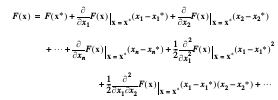

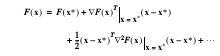
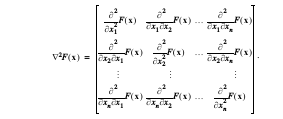

## Vector Case of Taylor Series Expansion

The neural network performance index $ F $ will not be a function of a scalar $ x $; instead, it will be a function of all the network parameters (weights and biases), which can be very numerous. Therefore, we need to extend the Taylor series expansion to functions of many variables. Consider the following function of $ n $ variables:

$$
F(x) = F(x_1, x_2, \ldots, x_n)
$$

The Taylor series expansion for this function, about the point $ x^* $, is given by:

$$
\begin{aligned}
F(x) &= F(x^*) + \nabla F(x^T)(x - x^*) \\
& \quad + \frac{1}{2}(x - x^*)^T \nabla^2 F(x^*) (x - x^*) + \ldots
\end{aligned}
$$

where:
- $\nabla F(x) $ is the gradient defined as:

$$
\nabla F(x) = \left[\frac{\partial F}{\partial x_1}, \frac{\partial F}{\partial x_2}, \ldots, \frac{\partial F}{\partial x_n}\right]
$$

- The Hessian $ \nabla^2 F(x) $ is defined as:

$$
\nabla^2 F(x) = 
\begin{bmatrix}
\frac{\partial^2 F}{\partial x_1^2} & \frac{\partial^2 F}{\partial x_1 \partial x_2} & \cdots \\
\frac{\partial^2 F}{\partial x_2 \partial x_1} & \frac{\partial^2 F}{\partial x_2^2} & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

The gradient and the Hessian are vital for understanding performance surfaces.

## Directional Derivatives

The $ i $-th element of the gradient, $ \frac{\partial F(x)}{\partial x_i} $, represents the first derivative of the performance index $ F $ along the $ x_i $ axis. The $ i $-th element of the diagonal of the Hessian matrix, $ \frac{\partial^2 F(x)}{\partial x_i^2} $, represents the second derivative of the performance index $ F $ along the $ x_i $ axis.

To determine the derivative of the function in an arbitrary direction, let $ p $ be a vector in the direction along which we wish to compute the derivative. The directional derivative can be computed as:

$$
D_p F(x) = p^T \nabla F(x)
$$

The second derivative along $ p $ can also be computed as:

$$
D_p^2 F(x) = p^T \nabla^2 F(x) p
$$

### Example

Consider the function:

$$
F(x) = x_1^2 + 2x_2^2
$$

Suppose we want to know the derivative of the function at the point $ x^* = \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} $ in the direction $ p = \begin{bmatrix} 2 \\ -1 \end{bmatrix} $.

First, we evaluate the gradient at $ x^* $:

$$
\nabla F(x^*) = \left[2x_1, 4x_2\right]_{x = x^*} = \left[1, 2\right]
$$

The derivative in the direction $ p $ can then be computed:

$$
D_p F(x^*) = \frac{1}{\sqrt{5}} \begin{bmatrix} 2 \\ -1 \end{bmatrix}^T \begin{bmatrix} 1 \\ 2 \end{bmatrix} = 0
$$

This indicates that the function has zero slope in the direction $ p $ from the point $ x^* $.


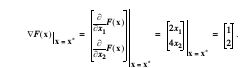
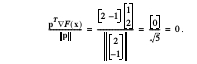


### Conclusion

Any direction that is orthogonal to the gradient will yield a zero slope. The direction with the greatest slope occurs when the direction vector aligns with the gradient, indicating the steepest ascent in the function value.


In [7]:
import numpy as np

# Define the function F(x)
def F(x1, x2):
    return x1**2 + 2 * x2**2

# Gradient of F
def gradient_F(x1, x2):
    dFdx1 = 2 * x1
    dFdx2 = 4 * x2
    return np.array([dFdx1, dFdx2])

# Hessian of F
def hessian_F():
    # The Hessian matrix is constant for this function
    return np.array([[2, 0],
                     [0, 4]])

# Taylor series expansion
def taylor_expansion(x1, x2, x1_star, x2_star):
    # Evaluate function at the expansion point
    F0 = F(x1_star, x2_star)
    # Compute the gradient at the expansion point
    grad_F_star = gradient_F(x1_star, x2_star)
    # Compute the Hessian at the expansion point
    hess_F_star = hessian_F()
    # Calculate the delta vector
    delta = np.array([x1 - x1_star, x2 - x2_star])
    # First order approximation
    first_order = F0 + np.dot(grad_F_star, delta)
    # Second order approximation
    second_order = first_order + 0.5 * np.dot(delta.T, np.dot(hess_F_star, delta))
    return F0, first_order, second_order

# Directional Derivative
def directional_derivative(x1, x2, p):
    grad_F = gradient_F(x1, x2)
    return np.dot(p, grad_F)

# Example usage
x1_star, x2_star = 0.5, 0.5  # Point of expansion
x1_range = np.linspace(0, 1, 100)
x2_range = np.linspace(0, 1, 100)

# Compute the original function values and the Taylor expansions
F_values = F(x1_range[:, None], x2_range[None, :])  # Create a grid for F
F0, first_order, second_order = taylor_expansion(x1_range, x2_range, x1_star, x2_star)

# Calculate directional derivative in the direction p = [2, -1]
p = np.array([2, -1])
directional_deriv = directional_derivative(x1_star, x2_star, p)

# Output results
print("Function value at x*:", F0)
print("First order approximation:", first_order)
print("Second order approximation:", second_order)
print("Directional derivative in the direction p:", directional_deriv)


Function value at x*: 0.75
First order approximation: [-0.75       -0.71969697 -0.68939394 -0.65909091 -0.62878788 -0.59848485
 -0.56818182 -0.53787879 -0.50757576 -0.47727273 -0.4469697  -0.41666667
 -0.38636364 -0.35606061 -0.32575758 -0.29545455 -0.26515152 -0.23484848
 -0.20454545 -0.17424242 -0.14393939 -0.11363636 -0.08333333 -0.0530303
 -0.02272727  0.00757576  0.03787879  0.06818182  0.09848485  0.12878788
  0.15909091  0.18939394  0.21969697  0.25        0.28030303  0.31060606
  0.34090909  0.37121212  0.40151515  0.43181818  0.46212121  0.49242424
  0.52272727  0.5530303   0.58333333  0.61363636  0.64393939  0.67424242
  0.70454545  0.73484848  0.76515152  0.79545455  0.82575758  0.85606061
  0.88636364  0.91666667  0.9469697   0.97727273  1.00757576  1.03787879
  1.06818182  1.09848485  1.12878788  1.15909091  1.18939394  1.21969697
  1.25        1.28030303  1.31060606  1.34090909  1.37121212  1.40151515
  1.43181818  1.46212121  1.49242424  1.52272727  1.5530303   1.5833333

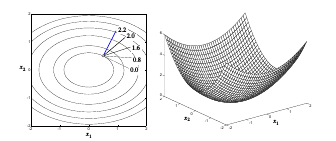

Figure.2 Quadratic Function and Directional Derivatives

## Performance Learning and Optimum Points

The objective of performance learning is to optimize the network performance index. In this section, we will define what we mean by an optimum point. We will assume that the optimum point is a minimum of the performance index. The definitions can be easily modified for maximization problems.

### Definitions of Minimum Points

1. **Strong Minimum**  
   The point $ x^* $ is a **strong minimum** of $ F(x) $ if a scalar $ \delta > 0 $ exists, such that
   $$
   F(x^*) < F(x^* + \Delta x) \quad \text{for all } \Delta x \text{ such that } 0 < \Delta x < \delta.
   $$
   In other words, if we move away from a strong minimum a small distance in any direction, the function will increase.

2. **Global Minimum**  
   The point $ x^* $ is a **unique global minimum** of $ F(x) $ if
   $$
   F(x^*) < F(x^* + \Delta x) \quad \text{for all } \Delta x \neq 0.
   $$
   For a simple strong minimum $ x^* $, the function may be smaller than $ F(x^*) $ at some points outside a small neighborhood of $ x^* $. Therefore, this is sometimes called a **local minimum**. For a global minimum, the function will be larger than the minimum point at every other point in the parameter space.

3. **Weak Minimum**  
   The point $ x^* $ is a **weak minimum** of $ F(x) $ if it is not a strong minimum, and a scalar $ \delta > 0 $ exists, such that
   $$
   F(x^*) \leq F(x^* + \Delta x) \quad \text{for all } \Delta x \text{ such that } 0 < \Delta x < \delta.
   $$
   No matter which direction we move away from a weak minimum, the function cannot decrease, although there may be some directions in which the function does not change.

### Example of Local and Global Minimum Points

Consider the scalar function:
$$
F(x) = 3x^4 - 7x^2 - \frac{1}{2}x + 6.
$$
This function is displayed in Figure 8.3. Notice that it has two strong minimum points: at approximately $-1.1$ and $1.1$. For both of these points, the function increases in a local neighborhood. The minimum at \(1.1\) is a global minimum since there is no other point for which the function is as small. There is no weak minimum for this function.

### Vector Case Example

Now let's consider a vector case with the following function:
$$
F(x) = (x_2 - x_1)^4 + 8x_1 x_2 - x_1 + x_2 + 3.
$$
In Figure 8.4, we have a contour plot (a series of curves along which the function value remains constant) and a 3-D surface plot for this function (for function values less than 12). 

We can see that the function has two strong local minimum points: one at $(-0.42, 0.42)$, and the other at $(0.55, -0.55)$. The global minimum point is at $(0.55, -0.55)$.

There is also another interesting feature of this function at $(-0.13, 0.13)$. It is called a **saddle point** because of the shape of the surface in the neighborhood of the point. It is characterized by the fact that along the line $x_1 = -x_2$, the saddle point is a local maximum, but along a line orthogonal to that line, it is a local minimum.

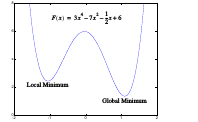

Figure.3 Scalar Example of Local and Global Minima

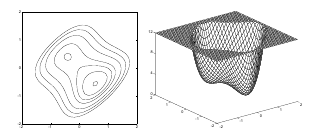

Figure.4 Vector Example of Minima and Saddle Point

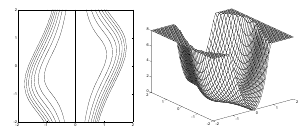

Figure.5 Weak Minimum Example



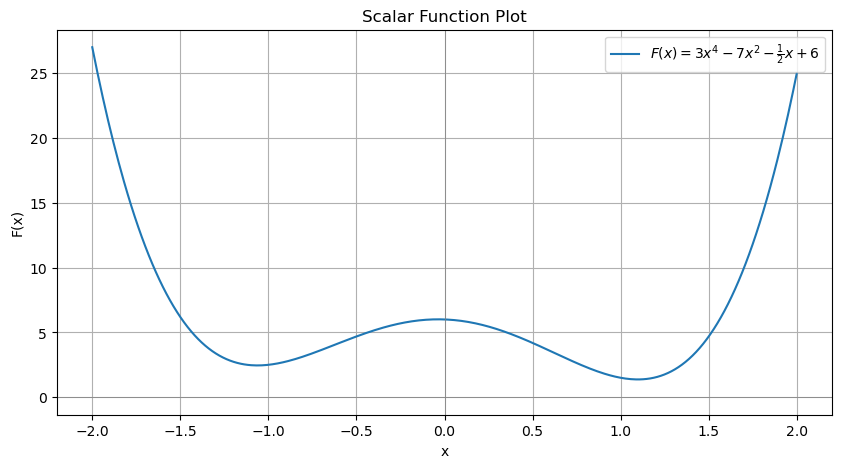

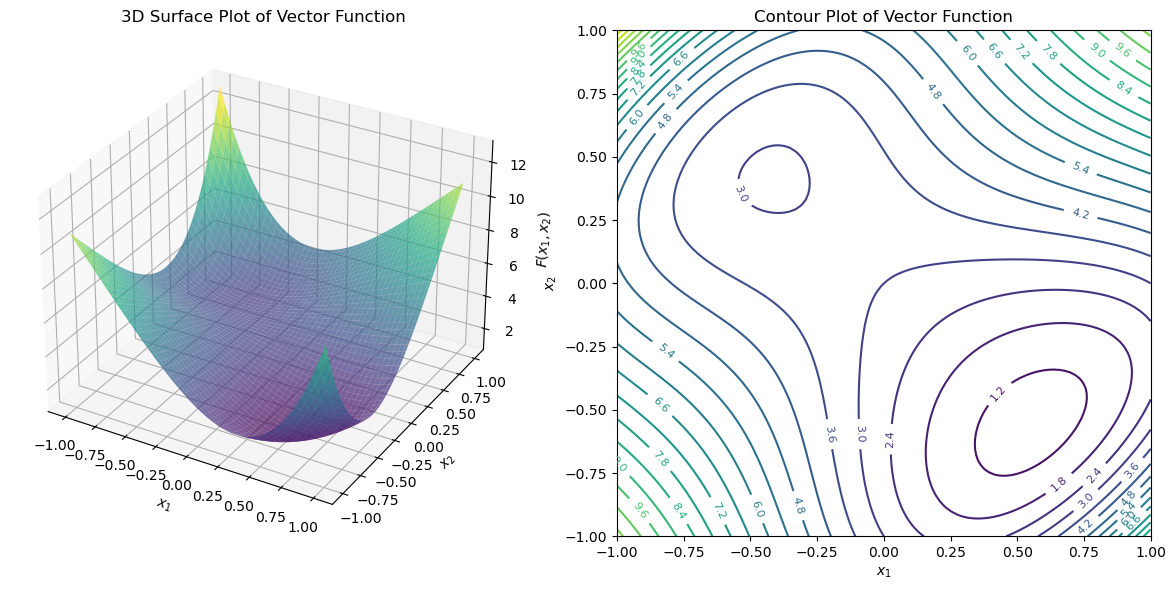

Strong local minima of scalar function occur at approximately: x = -1.1 and x = 1.1.
Global minimum of scalar function occurs at approximately: x = 1.1.
Strong local minima of vector function occur at approximately: (-0.42, 0.42) and (0.55, -0.55).
Global minimum of vector function occurs at approximately: (0.55, -0.55).
Saddle point of vector function occurs at approximately: (-0.13, 0.13).


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions
def F_scalar(x):
    """Scalar function F(x) = 3x^4 - 7x^2 - 1/2 x + 6."""
    return 3 * x**4 - 7 * x**2 - 0.5 * x + 6

def F_vector(x1, x2):
    """Vector function F(x1, x2) = (x2 - x1)^4 + 8x1*x2 - x1 + x2 + 3."""
    return (x2 - x1)**4 + 8 * x1 * x2 - x1 + x2 + 3

# Create a range of x values for the scalar function
x_values = np.linspace(-2, 2, 400)
F_values_scalar = F_scalar(x_values)

# Plot the scalar function
plt.figure(figsize=(10, 5))
plt.plot(x_values, F_values_scalar, label=r'$F(x) = 3x^4 - 7x^2 - \frac{1}{2}x + 6$')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.title("Scalar Function Plot")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid()
plt.show()

# Create a meshgrid for the vector function
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = F_vector(X1, X2)

# Plot the vector function
fig = plt.figure(figsize=(12, 6))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)
ax1.set_title("3D Surface Plot of Vector Function")
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$F(x_1, x_2)$')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X1, X2, Z, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_title("Contour Plot of Vector Function")
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.tight_layout()
plt.show()

# Print out information about minima and saddle points
print("Strong local minima of scalar function occur at approximately: x = -1.1 and x = 1.1.")
print("Global minimum of scalar function occurs at approximately: x = 1.1.")
print("Strong local minima of vector function occur at approximately: (-0.42, 0.42) and (0.55, -0.55).")
print("Global minimum of vector function occurs at approximately: (0.55, -0.55).")
print("Saddle point of vector function occurs at approximately: (-0.13, 0.13).")


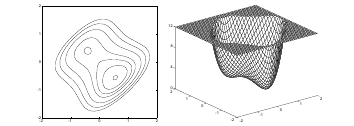

Figure.4 Vector Example of Minima and Saddle Point



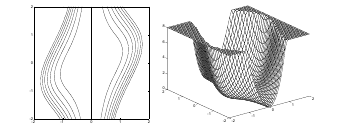

Figure.5 Weak Minimum Example


